<a href="https://colab.research.google.com/github/bcalik94/Multimodal-Speech-Summarisation-/blob/main/SpotifyPodcast_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q transformers  rouge-score

     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 74.2 MB/s 
     |████████████████████████████████| 596 kB 76.2 MB/s 
     |████████████████████████████████| 86 kB 3.6 MB/s 


In [ ]:
import os

import numpy as np
 
import pandas as pd 


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from tqdm.notebook import tqdm
import pickle 
import os 
import random
import pickle
  

In [ ]:
F0semitone = ['MEAN:F0semitoneFrom27.5Hz_sma3nz_amean',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope']



F0semitone += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), F0semitone)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F0semitone))
F0semitone.remove('MIN:F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope')
F0semitone.remove('MIN:F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope')
F0semitone.remove('MIN:F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope')



loudness = ['MEAN:loudness_sma3_amean',
 'MEAN:loudness_sma3_stddevNorm',
 'MEAN:loudness_sma3_percentile20.0',
 'MEAN:loudness_sma3_percentile50.0',
 'MEAN:loudness_sma3_percentile80.0',
 'MEAN:loudness_sma3_pctlrange0-2',
 'MEAN:loudness_sma3_meanRisingSlope',
 'MEAN:loudness_sma3_stddevRisingSlope',
 'MEAN:loudness_sma3_meanFallingSlope',
 'MEAN:loudness_sma3_stddevFallingSlope', 
 'MEAN:loudnessPeaksPerSec']

loudness += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), loudness)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), loudness))


spectral_Flux = ['MEAN:spectralFlux_sma3_amean',
 'MEAN:spectralFlux_sma3_stddevNorm', 
 'MEAN:spectralFluxV_sma3nz_amean',
 'MEAN:spectralFluxV_sma3nz_stddevNorm', 
 'MEAN:spectralFluxUV_sma3nz_amean']

spectral_Flux += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), spectral_Flux)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), spectral_Flux))

mfcc = ['MEAN:mfcc1_sma3_amean',
 'MEAN:mfcc1_sma3_stddevNorm',
 'MEAN:mfcc2_sma3_amean',
 'MEAN:mfcc2_sma3_stddevNorm',
 'MEAN:mfcc3_sma3_amean',
 'MEAN:mfcc3_sma3_stddevNorm',
 'MEAN:mfcc4_sma3_amean',
 'MEAN:mfcc4_sma3_stddevNorm',
 'MEAN:mfcc1V_sma3nz_amean',
 'MEAN:mfcc1V_sma3nz_stddevNorm',
 'MEAN:mfcc2V_sma3nz_amean',
 'MEAN:mfcc2V_sma3nz_stddevNorm',
 'MEAN:mfcc3V_sma3nz_amean',
 'MEAN:mfcc3V_sma3nz_stddevNorm',
 'MEAN:mfcc4V_sma3nz_amean',
 'MEAN:mfcc4V_sma3nz_stddevNorm']

mfcc += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), mfcc)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), mfcc))


jitter = ['MEAN:jitterLocal_sma3nz_amean',
 'MEAN:jitterLocal_sma3nz_stddevNorm']

jitter += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), jitter)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), jitter))


shimmer = ['MEAN:shimmerLocaldB_sma3nz_amean',
 'MEAN:shimmerLocaldB_sma3nz_stddevNorm']

shimmer += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), shimmer)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), shimmer))


HNR = ['MEAN:HNRdBACF_sma3nz_amean',
 'MEAN:HNRdBACF_sma3nz_stddevNorm']

HNR += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), HNR)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), HNR))


H1_A3 = ['MEAN:logRelF0-H1-H2_sma3nz_amean',
 'MEAN:logRelF0-H1-H2_sma3nz_stddevNorm',
 'MEAN:logRelF0-H1-A3_sma3nz_amean',
 'MEAN:logRelF0-H1-A3_sma3nz_stddevNorm']

H1_A3 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), H1_A3)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), H1_A3))


F1 = ['MEAN:F1frequency_sma3nz_stddevNorm',
 'MEAN:F1bandwidth_sma3nz_amean',
 'MEAN:F1bandwidth_sma3nz_stddevNorm',
 'MEAN:F1amplitudeLogRelF0_sma3nz_amean',
 'MEAN:F1amplitudeLogRelF0_sma3nz_stddevNorm']

F1 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), F1)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F1))


F2 = ['MEAN:F2frequency_sma3nz_amean',
 'MEAN:F2frequency_sma3nz_stddevNorm',
 'MEAN:F2bandwidth_sma3nz_amean',
 'MEAN:F2bandwidth_sma3nz_stddevNorm',
 'MEAN:F2amplitudeLogRelF0_sma3nz_amean',
 'MEAN:F2amplitudeLogRelF0_sma3nz_stddevNorm']

F2 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), F2)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F2))


F3 = ['MEAN:F3frequency_sma3nz_amean',
 'MEAN:F3frequency_sma3nz_stddevNorm',
 'MEAN:F3bandwidth_sma3nz_amean',
 'MEAN:F3bandwidth_sma3nz_stddevNorm',
 'MEAN:F3amplitudeLogRelF0_sma3nz_amean',
 'MEAN:F3amplitudeLogRelF0_sma3nz_stddevNorm']

F3 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'),F3)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F3))


alphaRatio = ['MEAN:alphaRatioV_sma3nz_amean',
 'MEAN:alphaRatioV_sma3nz_stddevNorm',
 'MEAN:alphaRatioUV_sma3nz_amean']

alphaRatio  += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), alphaRatio )) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), alphaRatio ))

hammarberg = ['MEAN:hammarbergIndexV_sma3nz_amean',
 'MEAN:hammarbergIndexV_sma3nz_stddevNorm', 
 'MEAN:hammarbergIndexUV_sma3nz_amean']

hammarberg += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), hammarberg)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), hammarberg))


slopeV = ['MEAN:slopeV0-500_sma3nz_amean',
 'MEAN:slopeV0-500_sma3nz_stddevNorm',
 'MEAN:slopeV500-1500_sma3nz_amean',
 'MEAN:slopeV500-1500_sma3nz_stddevNorm', 
 'MEAN:slopeUV0-500_sma3nz_amean',
 'MEAN:slopeUV500-1500_sma3nz_amean']

slopeV  += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), slopeV )) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), slopeV ))

Segments = ['MEAN:VoicedSegmentsPerSec',
 'MEAN:MeanVoicedSegmentLengthSec',
 'MEAN:StddevVoicedSegmentLengthSec',
 'MEAN:MeanUnvoicedSegmentLength',
 'MEAN:StddevUnvoicedSegmentLength',
 'MEAN:equivalentSoundLevel_dBp']

Segments += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), Segments)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), Segments))
#Remove features which have 0 stds
Segments.remove('MIN:VoicedSegmentsPerSec')
Segments.remove('MIN:StddevVoicedSegmentLengthSec')
Segments.remove('MIN:StddevUnvoicedSegmentLength')
Segments.remove('MIN:MeanUnvoicedSegmentLength')
Segments.remove('MAX:MeanVoicedSegmentLengthSec')



LLDs ={'F0semitone':F0semitone, 'loudness': loudness, 'spectral_Flux': spectral_Flux, 'mfcc': mfcc,'jitter': jitter,'shimmer': shimmer,'HNR':HNR ,'H1_A3': H1_A3, 'F1': F1, 'F2': F2,'F3' :F3,'alphaRatio': alphaRatio, 'hammarberg': hammarberg, 'slopeV': slopeV, 'Segments': Segments  }

In [ ]:
LLDs ={'F0semitone':F0semitone, 'loudness': loudness, 'spectral_Flux': spectral_Flux, 'mfcc': mfcc,'jitter': jitter,'shimmer': shimmer,'HNR':HNR ,'H1_A3': H1_A3, 'F1': F1, 'F2': F2,'F3' :F3,'alphaRatio': alphaRatio, 'hammarberg': hammarberg, 'slopeV': slopeV, 'Segments': Segments  }

In [ ]:
pickle_off = open ("/content/drive/MyDrive/Yedek/allsents_df_4197episodes.txt", "rb")
LLD_LDA_df = pickle.load(pickle_off).sort_values('sentence_id').reset_index(drop = True)

sents_df= LLD_LDA_df


#Split the dataset to train, val and test

episode_list = list(sents_df['doc_id'].unique())

random.shuffle(episode_list)

train_ids = episode_list[0:int(len(episode_list)*0.6) ]

test_ids = episode_list[int(len(episode_list)*0.7):int(len(episode_list)*0.8)]

valid_ids = episode_list[int(len(episode_list)*0.8):int(len(episode_list))]


train_df = sents_df.groupby('doc_id').filter(lambda x: x['doc_id'].values[0] in train_ids)
val_df = sents_df.groupby('doc_id').filter(lambda x: x['doc_id'].values[0] in valid_ids)
test_df = sents_df.groupby('doc_id').filter(lambda x: x['doc_id'].values[0] in test_ids)

train_df = train_df.append(val_df)
print('train-val-test')
print(len(train_df), len(test_df))
print( "Train,val, test shape ", train_df.shape,test_df.shape)
print("Total number of episodes in all sets:" + str(len(train_df.groupby('episode_id'))))
print("Total number of episodes in valid sets:" + str(len(test_df.groupby('episode_id'))))
train_df

In [ ]:
sents_df.loc[30:40,'MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevNorm'].values

array([0.27057239325607524, 0.24328427016735077, 0.21411927721717142,
       0.3003032406171163, 0.26357732025476605, 0.16418641153723001,
       0.25682398218374985, 0.2427649900869087, 0.18721095224221548,
       0.2823793374829822, 0.23349550366401672], dtype=object)

In [ ]:
eda_df = sents_df[['doc_id','show_name','episode_id','Transcript','Description']].drop_duplicates()

episode = sents_df[sents_df['doc_id'] == 288].reset_index(drop=True)
episode2 = sents_df[sents_df['doc_id'] == 42].reset_index(drop=True)
episode3 = sents_df[sents_df['doc_id'] == 794].reset_index(drop=True)

,sentence_id,doc_id,show_name,episode_id,Description,Transcript,speakerTag,sentence,MEAN:F0semitoneFrom27.5Hz_sma3nz_amean,MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevNorm,...,MAX:loudnessPeaksPerSec,MAX:VoicedSegmentsPerSec,MAX:MeanVoicedSegmentLengthSec,MAX:StddevVoicedSegmentLengthSec,MAX:MeanUnvoicedSegmentLength,MAX:StddevUnvoicedSegmentLength,MAX:equivalentSoundLevel_dBp,rouge_score,label_range_perdoc,label_score
0,83416,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,1,You're listening to Millennials with money a p...,25.287631,0.231418,...,8.333334,4.166667,0.92,0.415,0.08,0.005,-14.652638,0.082192,"(-0.001, 0.0969]",0
1,83417,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,1,I'm Jose and I'm Charlie you're on official so...,30.381214,0.183933,...,7.291667,5.208333,0.46,0.38,0.36,0.34,-15.681095,0.055556,"(-0.001, 0.0969]",0
2,83418,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,1,And we're story straight from Millennial Urban...,27.289516,0.135,...,8.333334,6.25,0.95,0.29937,0.11,0.07,-15.465183,0.078947,"(-0.001, 0.0969]",0
3,83419,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,1,What a what a fancy name.,23.286549,0.242566,...,5.208333,4.166667,0.26,0.206074,0.065,0.035,-17.870031,0,"(-0.001, 0.0969]",0
4,83420,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,1,Yeah who recently?,31.757109,0.151475,...,6.25,4.166667,0.445,0.305,0.04,0.021213,-14.726122,0.033333,"(-0.001, 0.0969]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,83625,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,2,Thank you for listening to Millennials with mo...,34.093301,0.253978,...,7.291667,4.166667,0.95,0.435,0.07,0.06261,-15.084192,0.030769,"(-0.001, 0.0969]",0
210,83626,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,2,"If you like what you heard, please rate US and...",34.567821,0.173633,...,8.333334,6.25,0.95,0.375,0.11,0.067052,-15.905397,0.098765,"(0.0969, 0.75]",1
211,83627,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,2,"Also, check out our recommendations and refere...",37.111243,0.106588,...,7.291667,6.25,0.29,0.184932,0.133333,0.146135,-16.354206,0.088235,"(-0.001, 0.0969]",0
212,83628,288,millennials with money,spotify:episode:2kmmLOZHvFAcaPQgj2SkZ3,"the world caught us red handed. yep, our plot ...",You're listening to Millennials with money a ...,1,And please do join us next time where we're go...,28.376485,0.193261,...,8.333334,5.208333,0.455,0.385,0.12,0.059067,-15.33637,0.107527,"(0.0969, 0.75]",1


In [ ]:
print(episode.loc[1,'Description'])

"the world caught us red handed. yep, our plot to conspire and decimate the economy has been foiled by brilliant, yet cranky gen-exers and baby boomers who weep at the thought of applebees going out of business. in this episode we will discuss why we can't help but systematically kill well-established goods and services."

In [ ]:
for index,row in episode.iterrows():
  print(row['sentence'], '--> ROUGE Score: ', row['rouge_score'], index, ' -->Label Scoree: ', row['label_score'])




You're listening to Millennials with money a podcast about the intricacies of an entitled generation. --> ROUGE Score:  0.0821917808219178 0  -->Label Scoree:  0
I'm Jose and I'm Charlie you're on official source of hot tags. --> ROUGE Score:  0.05555555555555556 1  -->Label Scoree:  0
And we're story straight from Millennial Urban America this podcast today is for my buddy and extra weight. --> ROUGE Score:  0.07894736842105263 2  -->Label Scoree:  0
What a what a fancy name. --> ROUGE Score:  0 3  -->Label Scoree:  0
Yeah who recently? --> ROUGE Score:  0.03333333333333333 4  -->Label Scoree:  0
Well not lock not too long ago gotten married and even bought a new house see how did he do that? --> ROUGE Score:  0.05128205128205128 5  -->Label Scoree:  0
Well, he also kind of inherited. --> ROUGE Score:  0.031746031746031744 6  -->Label Scoree:  0
It's the family business. --> ROUGE Score:  0.06451612903225806 7  -->Label Scoree:  0
Oh, of course, so I want to inherit a family business.

In [ ]:
episode[episode['label_score'] == 1]

In [ ]:
#Find LDA components of combined LLD features
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import product
import itertools

def LDA_for_LLDs(df): 

  LLD_scores = {}
  for LLD in LLDs.keys():
    print(LLD)
    #print(LLDs[LLD])
    X = df[LLDs[LLD]].values
    y = df['label_score']
    #Fit the LDA model
    lda = LinearDiscriminantAnalysis(n_components=1)
    #evaluate model
    transformed = lda.fit(X, y).transform(X)
    #print(LLD)
    #LLD_scores.append({str(LLD) : transformed.T})
    case = {str(LLD) : transformed.T.flatten()}
    LLD_scores.update(case)

  LLD_LDA = pd.DataFrame.from_dict(LLD_scores)

  LLD_LDA['y'] = df.reset_index(drop = True)['label_score']

  return LLD_LDA

In [ ]:
df = LDA_for_LLDs

<function __main__.LDA_for_LLDs>

In [ ]:
LDA_episode = LDA_for_LLDs(episode)

F0semitone
loudness
spectral_Flux
mfcc
jitter
shimmer
HNR
H1_A3
F1
F2
F3
alphaRatio
hammarberg
slopeV
Segments


In [ ]:

def ZNorm(df):
   b = pd.DataFrame()
   temp_df_1 = df[list(LLDs.keys())]
   b = df
   b[list(LLDs.keys())] =(temp_df_1-temp_df_1.mean())/temp_df_1.std()

   return b

LDA_episode = ZNorm(LDA_episode)
LDA_episode['sentence'] = episode['sentence']
LDA_episode

,F0semitone,loudness,spectral_Flux,mfcc,jitter,shimmer,HNR,H1_A3,F1,F2,F3,alphaRatio,hammarberg,slopeV,Segments,y,sentence
0,1.084675,0.459750,-0.395374,0.212330,0.119000,0.339690,0.523692,0.832470,0.085249,-0.333013,-0.530436,0.683440,0.630245,-0.012477,0.244429,0,You're listening to Millennials with money a p...
1,-0.150412,0.651275,0.663566,-0.679534,-0.246462,-0.523102,-0.811801,-0.468318,-0.158982,0.567179,0.681194,-0.609068,-0.747814,-2.398397,0.290292,0,I'm Jose and I'm Charlie you're on official so...
2,1.103492,0.433727,-0.213896,0.416461,-0.003797,-0.259698,-0.740421,-0.219398,-0.153770,0.842535,0.172390,-0.435697,0.421249,1.234224,-0.244570,0,And we're story straight from Millennial Urban...
3,-0.895966,-0.757510,-1.060838,-0.535902,-1.331341,0.179516,-0.542376,-1.249019,-1.197845,-0.721659,-1.548873,-0.711894,-1.385167,0.134986,-0.704028,0,What a what a fancy name.
4,-0.324377,-0.150295,-1.541497,-0.824271,-0.867449,-0.720478,-0.428191,-0.510508,-0.620474,-1.013460,-0.972991,-1.011107,-1.990220,0.463956,-0.687889,0,Yeah who recently?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,-2.106468,0.413395,0.242904,-0.079655,-0.510675,-0.495939,0.443319,0.127471,-0.190254,-1.000171,-0.464159,1.768124,0.290033,1.989285,0.571581,0,Thank you for listening to Millennials with mo...
210,0.084356,-0.108554,-0.201514,-0.058101,0.838663,-0.567489,-0.136969,4.948801,0.243624,0.338314,0.042427,-0.007909,-0.114299,1.365618,0.809497,1,"If you like what you heard, please rate US and..."
211,0.551948,0.307190,-0.438376,-0.775206,-0.041381,-0.057168,0.556293,1.805278,-0.111632,0.823939,0.667380,-0.762222,-1.016882,-0.331813,0.073334,0,"Also, check out our recommendations and refere..."
212,2.456271,3.346203,0.666366,0.943796,0.371072,-0.071793,0.524672,1.036840,-0.015933,0.249596,0.595814,0.626366,0.625329,1.670013,0.278515,1,And please do join us next time where we're go...


ValueError: ignored

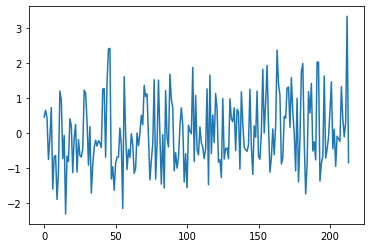

In [ ]:
plt.figure()
plt.plot(LDA_episode['loudness'])
plt.plot(episode
         

plt.subplot(111)
plt.plot(LDA_episode['loudness'])
plt.subplot(112)
plt.plot(LDA_episode['mfcc'])

plt.subplot(611)
plt.plot(LDA_episode['F2'])
plt.subplot(312)
plt.plot(LDA_episode['F3'])



for i in list(LLDs.keys()):
    u = 0 
    plt.subplot(211+u)
    plt.plot(LDA_episode[i])
    u += 1

LDA_episode['F2']




In [ ]:

sample_max = LDA_episode[LDA_episode['mfcc'] == LDA_episode['mfcc'].max()]



,F0semitone,loudness,spectral_Flux,mfcc,jitter,shimmer,HNR,H1_A3,F1,F2,F3,alphaRatio,hammarberg,slopeV,Segments,y,sentence
46,1.16803,2.426853,2.295134,4.586055,1.410477,1.031032,0.912538,1.010547,1.676672,1.500509,3.233737,0.771114,1.120961,1.545316,2.510352,1,"Oh no, we're rather risk our stomachs going to..."


In [ ]:
print(episode.loc[123,'sentence'])

I got off a long time ago because I had some complications but you know people are on birth control now 15-20 years like half your life you've been on this hormone regulator and I'm interested like what the side effects are ya this is something that is truly my deepest passion because I think women do not know and our gynecologist are not telling us and it's not really their fault because they did when they go Through their schooling they are not hot about how birth control affects the body especially from a holistic standpoint.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


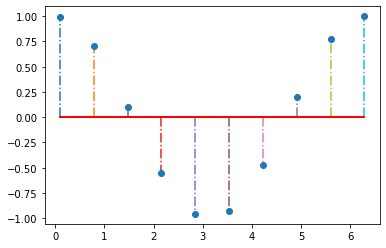

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# returns 10 evenly spaced samples from 0.1 to 2*PI
x = np.linspace(0.1, 2 * np.pi, 10)

markerline, stemlines, baseline = plt.stem(x, np.cos(x), '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


<function matplotlib.pyplot.show>

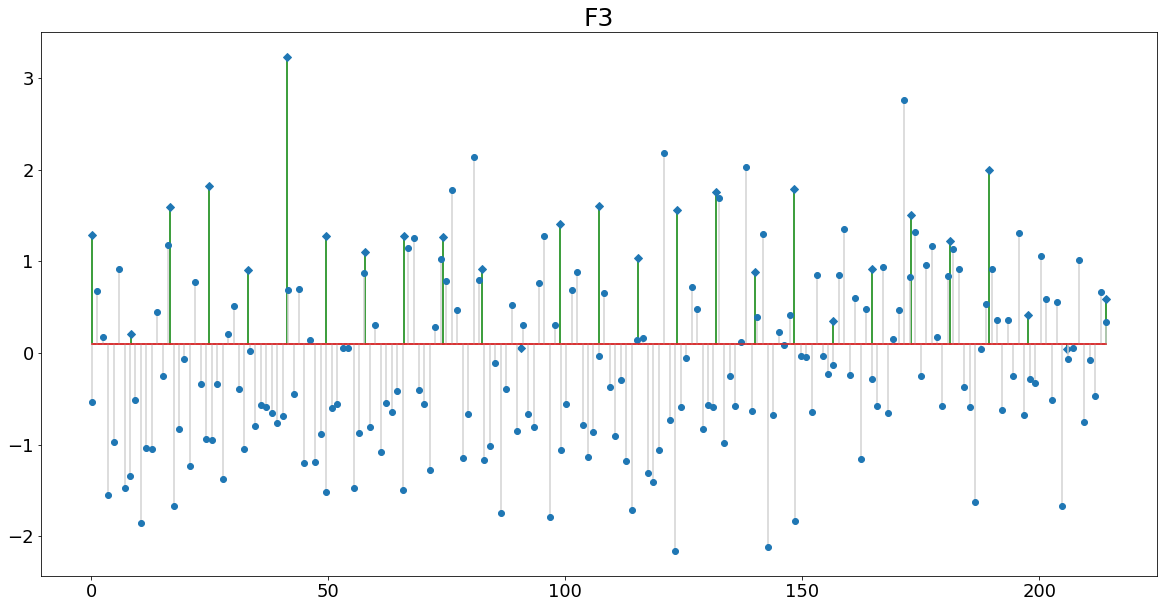

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.1, 214, 27)
x0 = np.linspace(0.1, 214, 187)

y1 = LDA_episode[LDA_episode['y'] == 1 ]['F3']
y0 = LDA_episode[LDA_episode['y'] == 0 ]['F3']

plt.figure(figsize=(20,10))
markerline, stemlines, baseline = plt.stem(x1, y1, linefmt='green', markerfmt='D', bottom=0.1, label = '1')
markerline, stemlines, baseline = plt.stem(x0+0.05, y0, linefmt='lightgrey', bottom=0.1)
#markerline.set_markerfacecolor('none')
plt.legend
plt.title('F3', fontsize = 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

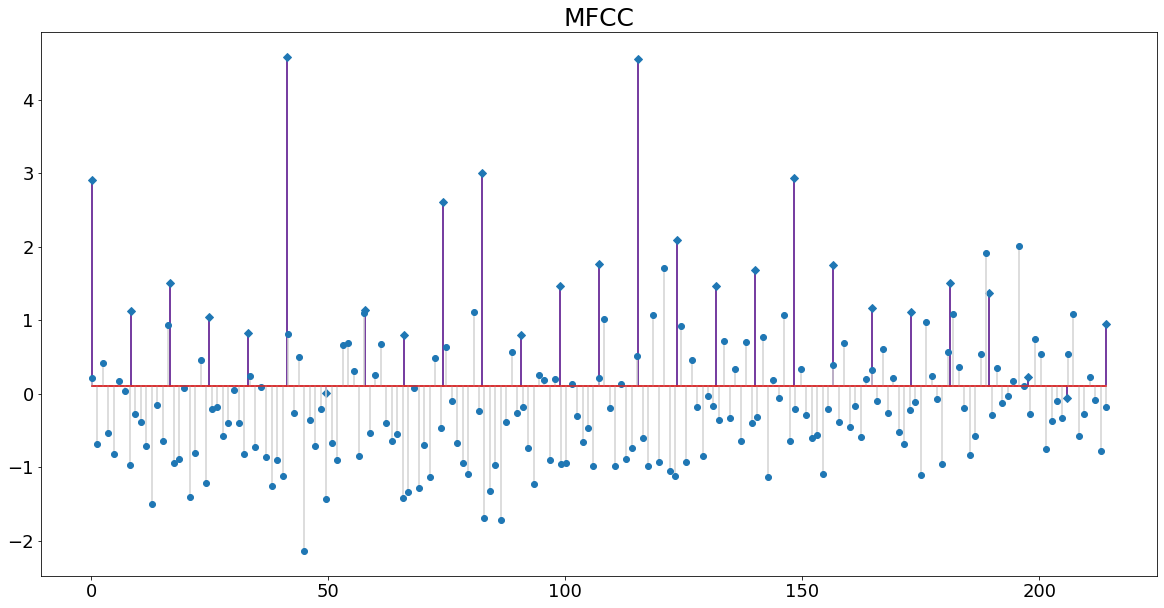

In [ ]:
x1 = np.linspace(0.1, 214, 27)
x0 = np.linspace(0.1, 214, 187)

y1 = LDA_episode[LDA_episode['y'] == 1 ]['mfcc']
y0 = LDA_episode[LDA_episode['y'] == 0 ]['mfcc']

plt.figure(figsize=(20,10))
markerline, stemlines, baseline = plt.stem(x1, y1, linefmt='indigo', markerfmt='D', bottom=0.1, label = '1')
markerline, stemlines, baseline = plt.stem(x0+0.05, y0, linefmt='lightgrey', bottom=0.1)
#markerline.set_markerfacecolor('none')
plt.legend
plt.title('MFCC', fontsize = 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

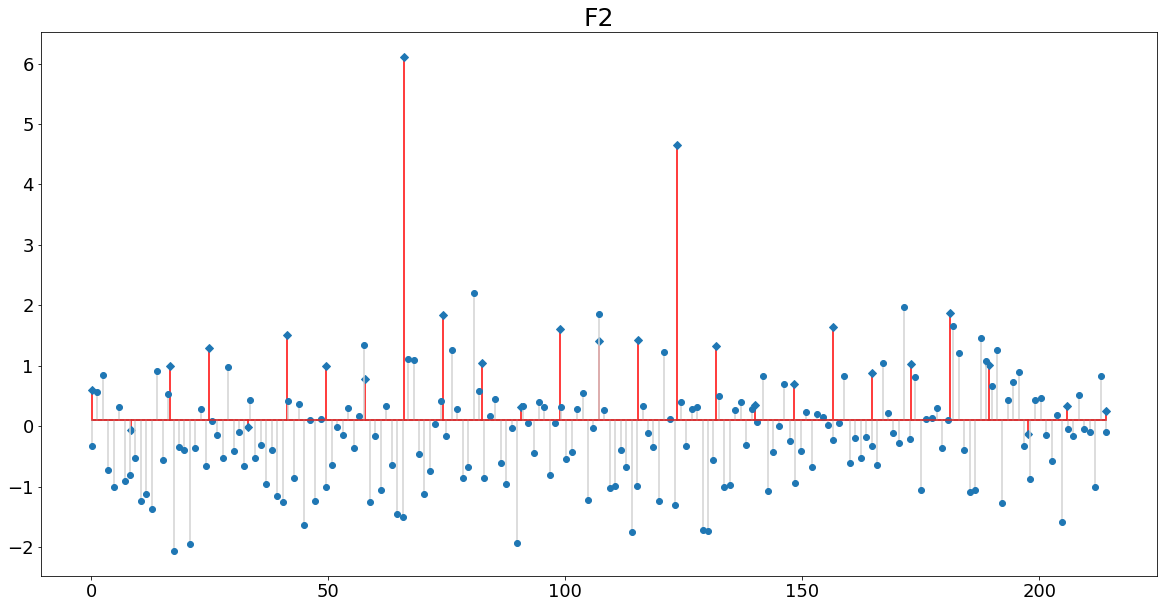

In [ ]:
x1 = np.linspace(0.1, 214, 27)
x0 = np.linspace(0.1, 214, 187)

y1 = LDA_episode[LDA_episode['y'] == 1 ]['F2']
y0 = LDA_episode[LDA_episode['y'] == 0 ]['F2']

plt.figure(figsize=(20,10))
markerline, stemlines, baseline = plt.stem(x1, y1, linefmt='red', markerfmt='D', bottom=0.1, label = '1')
markerline, stemlines, baseline = plt.stem(x0+0.05, y0, linefmt='lightgrey', bottom=0.1)
#markerline.set_markerfacecolor('none')
plt.legend

plt.title('F2', fontsize = 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

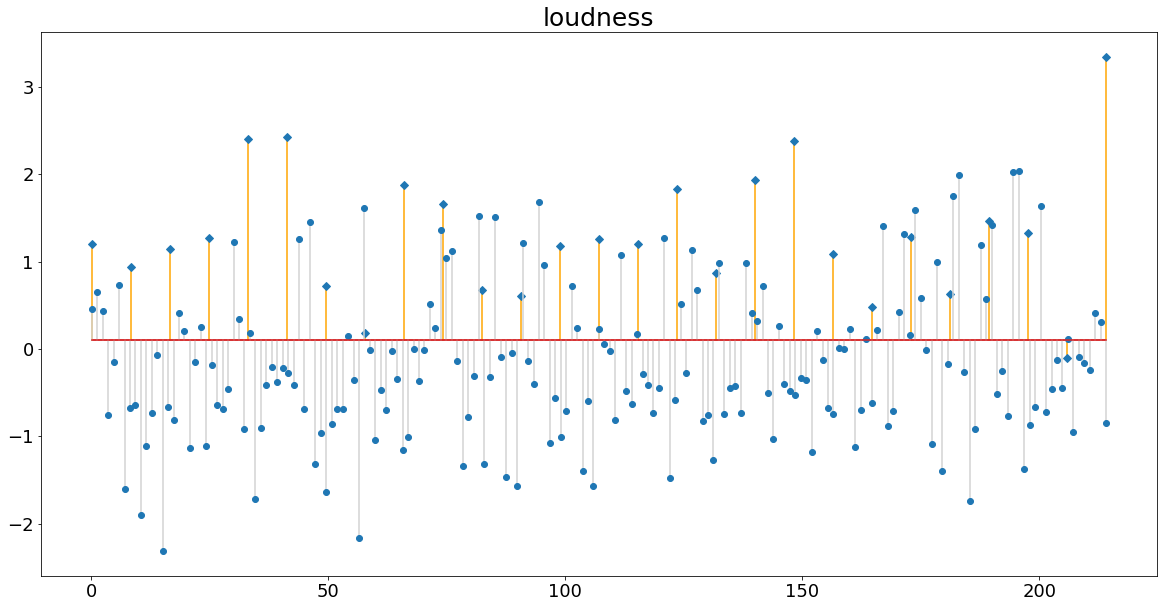

In [ ]:
x1 = np.linspace(0.1, 214, 27)
x0 = np.linspace(0.1, 214, 187)

y1 = LDA_episode[LDA_episode['y'] == 1 ]['loudness']
y0 = LDA_episode[LDA_episode['y'] == 0 ]['loudness']

plt.figure(figsize=(20,10))
markerline, stemlines, baseline = plt.stem(x1, y1, linefmt='orange', markerfmt='D', bottom=0.1, label = '1')
markerline, stemlines, baseline = plt.stem(x0+0.05, y0, linefmt='lightgrey', bottom=0.1)
#markerline.set_markerfacecolor('none')
plt.legend
plt.title('loudness', fontsize = 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show

In [ ]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import nltk
# nltk.download('punkt') # one time execution
import re
#nltk.download('stopwords') # one time execution
import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords

from sklearn.metrics.pairwise import cosine_similarity

import networkx as nx